In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D,Convolution2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import gc
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import set_random_seed
from tqdm import tqdm
from math import ceil
import math
import sys
import gc

import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.activations import softmax, relu, elu
from keras.optimizers import Adam, rmsprop, RMSprop   ,SGD
from keras.layers import BatchNormalization, LeakyReLU
from tqdm import tqdm

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
model=keras.models.load_model('../input/protest-dectection/besttt_model.h5')

In [3]:
from time import ctime
train=[]
fname=[]
basepath='../input/drone-videos/Drone Videos model1/'
for file in listdir(basepath):
    filepath=basepath+file
    if(file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg') ):
            image = imageio.imread(filepath)
            image=cv2.resize(image,(50,50))
            image=image/255
            train.append(image)
            fname.append(file)

In [4]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path,"rb") as f:
        img = Image.open(f)
        return img.convert('RGB')

In [5]:
train=np.array(train)

In [6]:
predict=model.predict(train)
predict=np.squeeze(predict,axis=1)
for i in range(predict.shape[0]):
    if(predict[i]<0.4):
        predict[i]=0
    else:
        predict[i]=1

predict

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [7]:
predict[24]

1.0

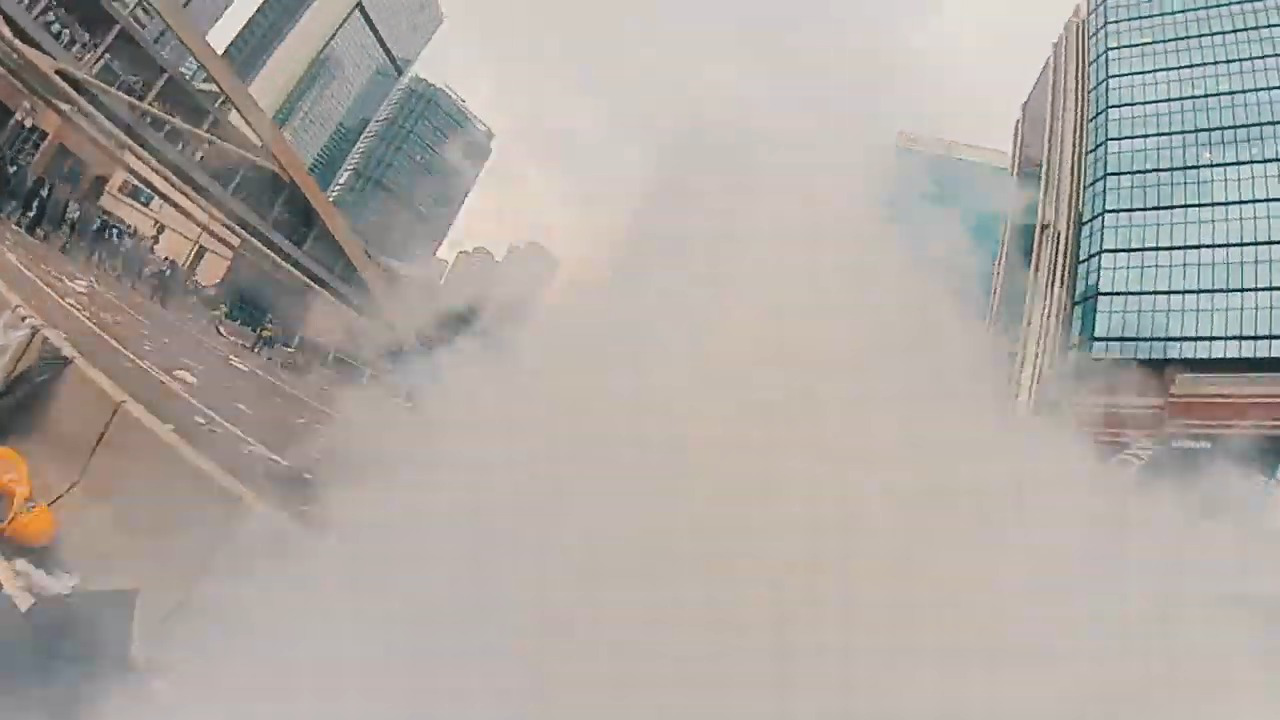

In [8]:
pil_loader(basepath+fname[24])